# Stellar Object Classification

Importing Libraries

In [34]:
# import libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
star_data = pd.read_csv("star_classification.csv")

In [3]:
star_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
star_data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [5]:
star_data.shape

(100000, 18)

In [7]:
star_data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [8]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Checking Missing Values and Handling them

In [6]:
star_data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Exploratory Data Analysis (EDA)

In [24]:
data = star_data.drop(columns='class', axis= 1)
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


In [25]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [26]:
data

array([[0.4342034 , 0.37690482, 0.50380246, ..., 0.45159189, 0.64800655,
        0.17017017],
       [0.54749622, 0.40228576, 0.49181212, ..., 0.8288413 , 0.89432004,
        0.42642643],
       [0.43420347, 0.39495978, 0.53413882, ..., 0.35094862, 0.54396505,
        0.2982983 ],
       ...,
       [0.64632312, 0.62384846, 0.33880973, ..., 0.20340363, 0.399645  ,
        0.07307307],
       [0.43969817, 0.58962907, 0.6429744 , ..., 0.52805146, 0.64991808,
        0.46946947],
       [0.43969804, 0.54692681, 0.67052516, ..., 0.58171159, 0.75040961,
        0.85085085]])

In [30]:
data = pd.DataFrame(data= data, columns= ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID'])

In [31]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,0.434203,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.434248,0.0,0.2,0.069530,0.451585,0.091831,0.451592,0.648007,0.170170
1,0.547496,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.547498,0.0,0.8,0.110429,0.828833,0.112389,0.828841,0.894320,0.426426
2,0.434203,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.434248,0.0,0.2,0.111452,0.350946,0.093170,0.350949,0.543965,0.298298
3,0.506985,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.507016,0.0,0.4,0.207566,0.723313,0.134210,0.723312,0.878072,0.774775
4,0.992503,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.992549,0.0,0.4,0.128834,0.476759,0.017959,0.476753,0.625205,0.841842


In [32]:
data['class'] = star_data['class']

In [33]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,0.434203,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.434248,0.0,0.2,0.069530,0.451585,0.091831,0.451592,0.648007,0.170170,GALAXY
1,0.547496,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.547498,0.0,0.8,0.110429,0.828833,0.112389,0.828841,0.894320,0.426426,GALAXY
2,0.434203,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.434248,0.0,0.2,0.111452,0.350946,0.093170,0.350949,0.543965,0.298298,GALAXY
3,0.506985,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.507016,0.0,0.4,0.207566,0.723313,0.134210,0.723312,0.878072,0.774775,GALAXY
4,0.992503,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.992549,0.0,0.4,0.128834,0.476759,0.017959,0.476753,0.625205,0.841842,GALAXY


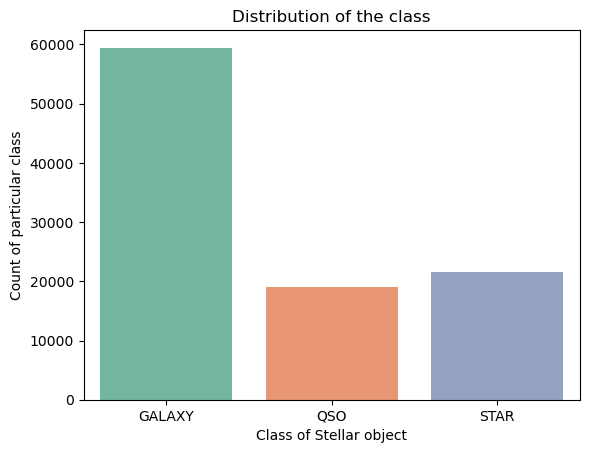

In [45]:
palette_colors = sns.color_palette("Set2")
sns.countplot(data= data, x= 'class', palette= palette_colors)
plt.xlabel("Class of Stellar object")
plt.ylabel("Count of particular class")
plt.title("Distribution of the class")
plt.show()